<a href="https://colab.research.google.com/github/Roy025/ML-Lab/blob/main/LAB/Bank_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




**Load the Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

df = pd.read_csv('/content/drive/MyDrive/bank-data/bank-data/bank-full.csv',sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Explore and Preprocess the dataset**

In [6]:
df.shape

(45211, 17)

In [7]:
df.info()

df.describe().astype(np.int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


**Show Distribution**

<ipython-input-8-8c2c2a556f47>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


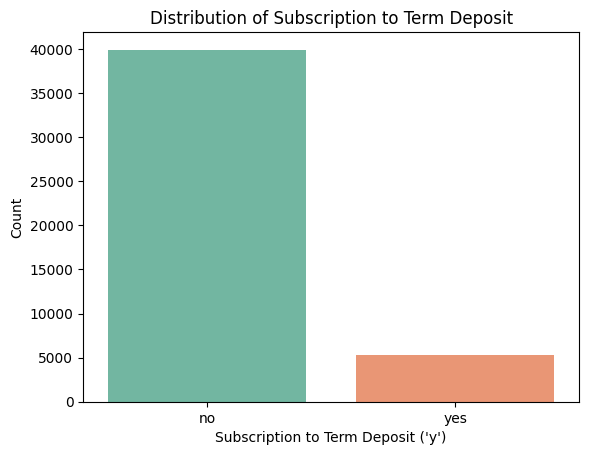

In [8]:
sns.countplot(x='y', data=df, palette='Set2')
plt.xlabel("Subscription to Term Deposit ('y')")
plt.ylabel("Count")
plt.title("Distribution of Subscription to Term Deposit")
plt.show()

# **Logistic Regression**

**One-Hot Encoding for Categorical Columns**

Converting categorical values into a binary matrix

In [9]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df['y'] = df['y'].map({'yes': 1, 'no': 0})

**Splitting into Features (X) and Target (y):**

In [10]:
X = df.drop('y', axis=1)
y = df['y']


**Data Splitting (80:20 Split):**

*   80% of the data for training the model
*   20% for evaluating its performance

In [11]:

y = df['y']
X = df.drop("y", axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("Information about x_train dataset:")
x_train.info()

print("\nInformation about x_test dataset:")
x_test.info()



Information about x_train dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 13932 to 2732
Columns: 117 entries, balance to age_95
dtypes: int64(6), uint8(111)
memory usage: 5.8 MB

Information about x_test dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9043 entries, 14001 to 13171
Columns: 117 entries, balance to age_95
dtypes: int64(6), uint8(111)
memory usage: 1.4 MB


In [12]:
x_train.shape, x_test.shape

((36168, 117), (9043, 117))

**Feature Scaling with StandardScaler**

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

**PCA**

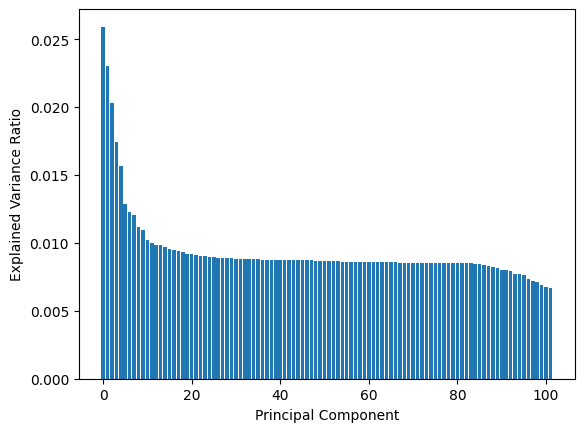

In [14]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

**Logistic Regression Model Training**

In [15]:
model = LogisticRegression(max_iter=20000, penalty='l2')

model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=20000)

**Model Prediction and Evaluation**

In [16]:



y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Precision:", {precision})
print("Recall:", {recall})
print("F1-score:", {f1score})
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8977109366360722
Precision: {0.6112903225806452}
Recall: {0.3565380997177799}
F1-score: {0.45038621509209753}
Confusion Matrix:
 [[7739  241]
 [ 684  379]]


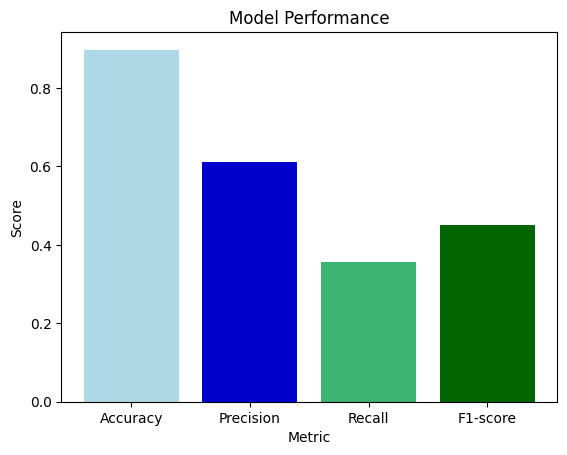

In [20]:
metrics = [accuracy_score, precision_score, recall_score, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

colors = ['lightblue', 'mediumblue', 'mediumseagreen', 'darkgreen']

scores = [metric(y_test, y_pred) for metric in metrics]

plt.bar(labels, scores, color=colors)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance")
plt.show()